# Trpo Stojkoski

# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [41]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [42]:
# Read files into dataframes 
CSVs = {
    'CO': 'CSVs/CO.csv',
    'NO2': 'CSVs/NO2.csv',
    'O3': 'CSVs/O3.csv',
    'PM10': 'CSVs/PM10.csv',
    'PM25': 'CSVs/PM25.csv'
        }

dataframes = {}

for pollutant, CSVs in CSVs.items():
    dataframes[pollutant] = pd.read_csv(CSVs)

co_data = dataframes['CO']
no2_data = dataframes['NO2']
o3_data = dataframes['O3']
pm10_data = dataframes['PM10']
pm25_data = dataframes['PM25']

## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [43]:
# Display dataframes and check data types
print("CO Data:")
print(co_data.head())
print("\n")

print("NO2 Data:")
print(no2_data.head())
print("\n")

print("O3 Data:")
print(o3_data.head())
print("\n")

print("PM10 Data:")
print(pm10_data.head())
print("\n")

print("PM25 Data:")
print(pm25_data.head())
print("\n")


print("Data Types:")
print("CO Data Types:")
print(co_data.dtypes)
print("\n")

print("NO2 Data Types:")
print(no2_data.dtypes)
print("\n")

print("O3 Data Types:")
print(o3_data.dtypes)
print("\n")

print("PM10 Data Types:")
print(pm10_data.dtypes)
print("\n")

print("PM25 Data Types:")
print(pm25_data.dtypes)

CO Data:
   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Mobile  Rektorat                 time  
0     NaN    0.3708  2012-01-01 00:00:00  
1     NaN    0.4097  2012-01-01 01:00:00  
2     NaN    0.4061  2012-01-01 02:00:00  
3     NaN    0.6500  2012-01-01 03:00:00  
4     NaN    0.7198  2012-01-01 04:00:00  


NO2 Data:
   Unnamed: 0.1  Unnamed: 0   Centar  GaziBaba   Karpos   Lisice  Miladinovci  \
0         36212       36212  27.5615       NaN  31.1979  40.2691          NaN   
1         36213       36213  16.1041       NaN  34.4904  33.3520          NaN   
2        

## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

In [44]:
co_data = co_data.drop(columns='Mobile')
no2_data = no2_data.drop(columns='Mobile')
o3_data = o3_data.drop(columns='Mobile')
pm10_data = pm10_data.drop(columns='Mobile')
pm25_data = pm25_data.drop(columns='Mobile')

co_data.rename(columns={'time': 'datetime'}, inplace=True)
no2_data.rename(columns={'time': 'datetime'}, inplace=True)
o3_data.rename(columns={'time': 'datetime'}, inplace=True)
pm10_data.rename(columns={'time': 'datetime'}, inplace=True)
pm25_data.rename(columns={'time': 'datetime'}, inplace=True)

co_data['time'] = pd.to_datetime(co_data['datetime']).dt.time
co_data['date'] = pd.to_datetime(co_data['datetime']).dt.date

no2_data['time'] = pd.to_datetime(no2_data['datetime']).dt.time
no2_data['date'] = pd.to_datetime(no2_data['datetime']).dt.date

o3_data['time'] = pd.to_datetime(o3_data['datetime']).dt.time
o3_data['date'] = pd.to_datetime(o3_data['datetime']).dt.date

pm10_data['time'] = pd.to_datetime(pm10_data['datetime']).dt.time
pm10_data['date'] = pd.to_datetime(pm10_data['datetime']).dt.date

pm25_data['time'] = pd.to_datetime(pm25_data['datetime']).dt.time
pm25_data['date'] = pd.to_datetime(pm25_data['datetime']).dt.date

co_data['pollutant'] = 'CO'
no2_data['pollutant'] = 'NO2'
o3_data['pollutant'] = 'O3'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM2.5'

combined_data = pd.concat([co_data, no2_data, o3_data, pm10_data, pm25_data], ignore_index=True)

print(combined_data.head())

   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Rektorat             datetime      time        date pollutant  
0    0.3708  2012-01-01 00:00:00  00:00:00  2012-01-01        CO  
1    0.4097  2012-01-01 01:00:00  01:00:00  2012-01-01        CO  
2    0.4061  2012-01-01 02:00:00  02:00:00  2012-01-01        CO  
3    0.6500  2012-01-01 03:00:00  03:00:00  2012-01-01        CO  
4    0.7198  2012-01-01 04:00:00  04:00:00  2012-01-01        CO  


# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

In [45]:
# Solution
co_mean = co_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
no2_mean = no2_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
o3_mean = o3_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
pm10_mean = pm10_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
pm25_mean = pm25_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()

highest_co_location = co_mean.idxmax()
highest_no2_location = no2_mean.idxmax()
highest_o3_location = o3_mean.idxmax()
highest_pm10_location = pm10_mean.idxmax()
highest_pm25_location = pm25_mean.idxmax()

print("Location with the highest average CO pollution:", highest_co_location)
print("Location with the highest average NO2 pollution:", highest_no2_location)
print("Location with the highest average O3 pollution:", highest_o3_location)
print("Location with the highest average PM10 pollution:", highest_pm10_location)
print("Location with the highest average PM2.5 pollution:", highest_pm25_location)

Location with the highest average CO pollution: Rektorat
Location with the highest average NO2 pollution: Rektorat
Location with the highest average O3 pollution: Miladinovci
Location with the highest average PM10 pollution: Lisice
Location with the highest average PM2.5 pollution: Karpos


# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [46]:
# Solution:
pollutant_dfs = [co_data, no2_data, o3_data, pm10_data, pm25_data]

for df in pollutant_dfs:
    pollutant = df['pollutant'].unique()[0]
    
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    
    max_pollution_location = df[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].idxmax(axis=1)
    
    max_pollution_timestamps = df.groupby(['year', max_pollution_location])['datetime'].max()
    
    print("Maximum pollution time stamps for", pollutant)
    print(max_pollution_timestamps)

Maximum pollution time stamps for CO
year             
2012  Centar         2012-12-31 23:00:00
      GaziBaba       2012-12-31 18:00:00
      Karpos         2012-12-31 21:00:00
      Lisice         2012-12-28 23:00:00
      Miladinovci    2012-12-29 21:00:00
      Rektorat       2012-12-31 12:00:00
2013  Centar         2013-12-31 18:00:00
      GaziBaba       2013-12-27 14:00:00
      Karpos         2013-12-30 20:00:00
      Lisice         2013-12-31 23:00:00
      Miladinovci    2013-05-14 11:00:00
      Rektorat       2013-04-23 18:00:00
2014  Centar         2014-12-27 01:00:00
      GaziBaba       2014-12-24 11:00:00
      Karpos         2014-12-22 00:00:00
      Lisice         2014-12-31 23:00:00
      Miladinovci    2014-12-21 18:00:00
      Rektorat       2014-12-27 03:00:00
2015  Centar         2015-07-06 19:00:00
      GaziBaba       2015-11-09 06:00:00
      Karpos         2015-12-21 10:00:00
      Lisice         2015-12-31 23:00:00
      Miladinovci    2015-07-14 13:00:00
  

# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In [47]:
# Solution
for df in pollutant_dfs:
    pollutant = df['pollutant'].unique()[0]

    df['month'] = pd.to_datetime(df['datetime']).dt.month

    average_pollution = df.groupby('month')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()

    highest_average_month = average_pollution.idxmax().values[0]

    print("Month with highest average pollution for", pollutant, "is:", highest_average_month)

Month with highest average pollution for CO is: 12
Month with highest average pollution for NO2 is: 12
Month with highest average pollution for O3 is: 7.0
Month with highest average pollution for PM10 is: 12
Month with highest average pollution for PM2.5 is: 12.0


# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

In [48]:
# Solution
for df in pollutant_dfs:
    pollutant = df['pollutant'].unique()[0]
    
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    
    average_pollution = df.groupby('hour')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
    
    print("Average pollution across locations for", pollutant, "in each hour:")
    print(average_pollution)

Average pollution across locations for CO in each hour:
        Centar  GaziBaba    Karpos    Lisice  Miladinovci  Rektorat
hour                                                               
0     0.800970  0.844273  0.700463  2.189421     0.522455  1.693393
1     0.725401  0.826719  0.625996  1.982519     0.486933  1.620727
2     0.638791  0.761041  0.541605  1.733168     0.461639  1.514198
3     0.558911  0.712069  0.476797  1.488823     0.442299  1.398520
4     0.483128  0.642719  0.414351  1.299225     0.428331  1.294069
5     0.447812  0.601476  0.373103  1.147581     0.423532  1.246459
6     0.423899  0.577098  0.341103  1.108214     0.432321  1.212854
7     0.474047  0.558282  0.350336  1.267712     0.500632  1.239903
8     0.653045  0.609793  0.452155  1.463494     0.558803  1.330545
9     0.715758  0.662981  0.452459  1.272030     0.540199  1.419403
10    0.625487  0.633796  0.411529  1.012750     0.507328  1.381939
11    0.553655  0.575523  0.367006  0.872299     0.486477  1

# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)@

<Figure size 2000x1000 with 0 Axes>

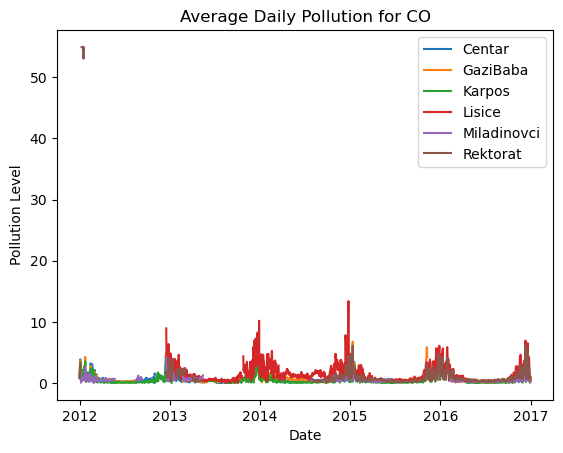

<Figure size 2000x1000 with 0 Axes>

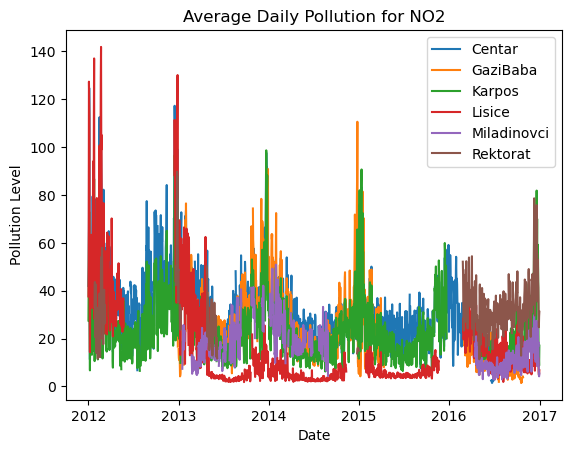

<Figure size 2000x1000 with 0 Axes>

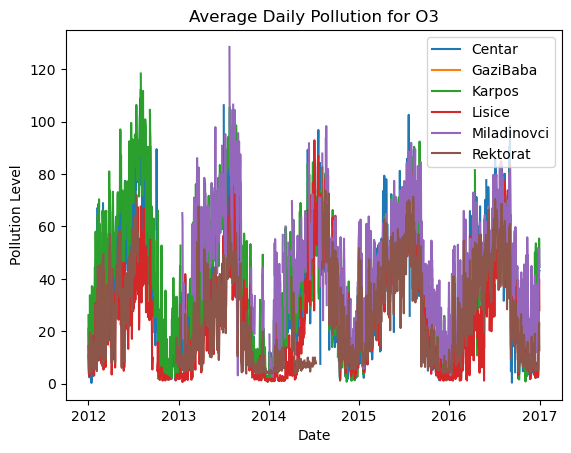

<Figure size 2000x1000 with 0 Axes>

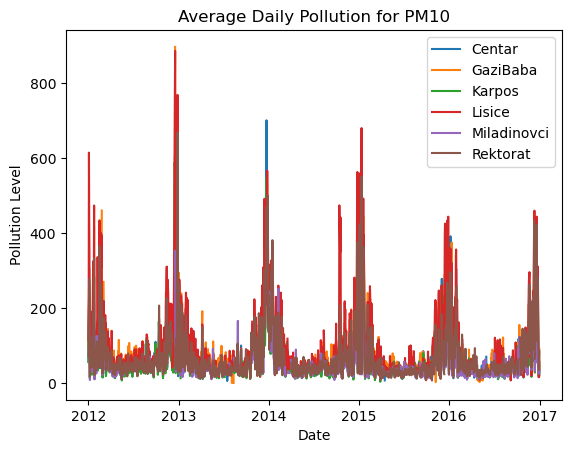

<Figure size 2000x1000 with 0 Axes>

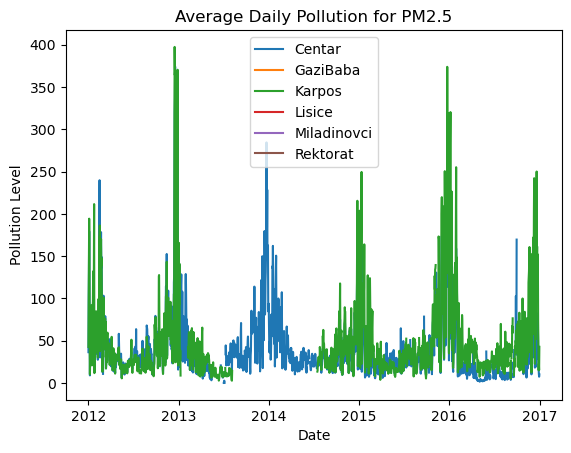

In [49]:
# Solution
for df in pollutant_dfs:
    pollutant = df['pollutant'].unique()[0]
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    average_pollution = df.groupby(df['datetime'].dt.date)[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
 
    plt.figure(figsize=(20, 10))
    average_pollution.plot()

    plt.title('Average Daily Pollution for {}'.format(pollutant))
    plt.xlabel('Date')
    plt.ylabel('Pollution Level')

    plt.show()

## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

In [50]:
# Solution
years = [2012, 2013, 2014, 2015, 2016]

pm10_worse_than_moderate = {}

for year in years:
    pm10_year = pm10_data[pm10_data['year'] == year]
    
    average_pm10 = pm10_year.groupby(pm10_year['datetime'].dt.date)[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
    
    num_worse_than_moderate = (average_pm10 > 154).sum()
    
    pm10_worse_than_moderate[year] = num_worse_than_moderate

for year, count in pm10_worse_than_moderate.items():
    print(f"In {year}, the average PM10 value was worse than moderate for {count} days.")

In 2012, the average PM10 value was worse than moderate for Centar         31
GaziBaba       29
Karpos         25
Lisice         63
Miladinovci     8
Rektorat       29
dtype: int64 days.
In 2013, the average PM10 value was worse than moderate for Centar         33
GaziBaba       14
Karpos         24
Lisice         55
Miladinovci     4
Rektorat       33
dtype: int64 days.
In 2014, the average PM10 value was worse than moderate for Centar         21
GaziBaba       17
Karpos         22
Lisice         52
Miladinovci     9
Rektorat       29
dtype: int64 days.
In 2015, the average PM10 value was worse than moderate for Centar         40
GaziBaba       44
Karpos         28
Lisice         61
Miladinovci     6
Rektorat       28
dtype: int64 days.
In 2016, the average PM10 value was worse than moderate for Centar         26
GaziBaba       38
Karpos         27
Lisice         51
Miladinovci     4
Rektorat       36
dtype: int64 days.


## Question 7
On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

In [52]:
# Solution
for year in years:
    pm10_year = pm10_data[pm10_data['year'] == year]
    
    is_worse_than_moderate = pm10_year[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']] > 154
    
    num_worse_than_moderate = is_worse_than_moderate.any(axis=1).sum()
  
    pm10_worse_than_moderate[year] = num_worse_than_moderate

for year, count in pm10_worse_than_moderate.items():
    print(f"In {year}, the value of PM10 was worse than moderate on at least one location for {count} days.")

In 2012, the value of PM10 was worse than moderate on at least one location for 1945 days.
In 2013, the value of PM10 was worse than moderate on at least one location for 1674 days.
In 2014, the value of PM10 was worse than moderate on at least one location for 1794 days.
In 2015, the value of PM10 was worse than moderate on at least one location for 1632 days.
In 2016, the value of PM10 was worse than moderate on at least one location for 1791 days.


## Question 8
Make a bar plot showing the average number of days per year when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

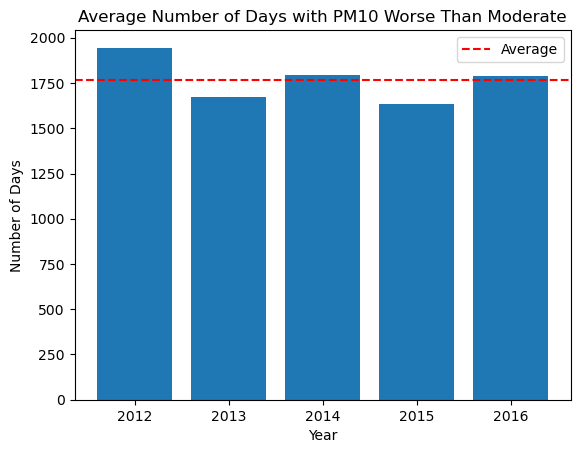

In [53]:
# Solution
average_days = sum(pm10_worse_than_moderate.values()) / len(pm10_worse_than_moderate)

plt.bar(pm10_worse_than_moderate.keys(), pm10_worse_than_moderate.values())

plt.title('Average Number of Days with PM10 Worse Than Moderate')
plt.xlabel('Year')
plt.ylabel('Number of Days')

plt.axhline(average_days, color='r', linestyle='--', label='Average')

plt.legend()

plt.show()